# Report on sales outlets' performance assessment


# Author: James Amezcua


# Project introduction :



The goal of this analysis is to assess the sales performance of the building-material retailer Home World. The results of the analysis will inform the marketing department of outlet performace and provide insights into what could possibly be done to improve their sales.

The data includes two datasets. The retail dataset contains purchase information including purchase_id, date, item, quantity, customer_id, shop_id, and whether the customer is a member of the loyalty program. The product codes dataset contains information on unit price for each product.

In what follows, we will first import and prepare the data.

Then we will preprocess the data by doing the following:
- study missing values

- type correspondnce

- search for duplicate values

- if necessary, remove duplicates, rename columns, convert types

Then an exploratory analysis will be carried out to examine:
- the distribution of purchase quantities

- the distribution of purchase values

- quantities and purchase values over time

- difference in the purchase quantities and values among stores

- popular items

- proportion of loyalty customers overall and by store

- difference between loyalty program and none loyalty program customer purchases

- is there a correlation between proportion of store's loyalty program cutomer purchases and its sales performance?

Then a hypothesis testing will be performed to test:
- the mean purchase quantities between loyalty program and non loyalty program customers. Our null hypothesis is that customers from loyalty programs have the same average purchase quantities as those who are not from loyalty programs. The alternative hypothesis is that they are different.

- the mean purchase values between loyalty program and non loyalty program customers. Our null hypothesis is that customers from loyalty programs have the same average purchase values as those who are not from loyalty programs. The alternative hypothesis is that they are different.

Drawing on the analysis, suggestions will be made to the company in order to improve its performance.

PDF presentation link : https://drive.google.com/file/d/1ODeP5sYN2-s0b9NfpW0q3FlJBpx_ZUvG/view?usp=sharing

Tableau dashboard link : https://public.tableau.com/app/profile/james.amezcua/viz/Reportonhomeworldstoresperformance_16439872266850/Dailypurchase?publish=yes

# Table of content

Part 1: Data importing

Part 2: Data preprocessing

Part 3: Exploratory data analysis

Part 4: Hypothesis testing

Part 5: Findings and conclusions

In [2]:
#import the libraries needed
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats as st
import plotly.graph_objects as go
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 1: Data importing

# Data importing

In [3]:
#check the first 50 rows for data types
data_df = pd.read_csv('https://code.s3.yandex.net/datasets/retail_dataset_us.csv', nrows = 50)
codes_df = pd.read_csv('https://code.s3.yandex.net/datasets/product_codes_us.csv', sep= ';', nrows=50)

In [4]:
data_df.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   purchaseid       50 non-null     int64  
 1   item_ID          50 non-null     object 
 2   Quantity         50 non-null     int64  
 3   purchasedate     50 non-null     object 
 4   CustomerID       36 non-null     float64
 5   loyalty_program  50 non-null     int64  
 6   ShopID           50 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.9+ KB


It looks like at least purchasedate should be of datetime datatype. item_ID most likely should be int type too but we can not be sure it doesn't contain letters. So we can leave it as it is.

We will also change the column names to lower case and with underscore between words when importing the data.
]


In [6]:
codes_df.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [7]:
codes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      50 non-null     object 
 1   price_per_one  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


The codes data looks alright. We will leave the datatypes as they are and just change the names when importing data.

In [8]:
data_names = ['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'loyalty_program', 'shop_id']
codes_names = ['purchase_id', 'unit_price']

In [9]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/retail_dataset_us.csv',
                  names = data_names,
                  parse_dates = ['purchase_date'],
                  header = 0)
codes = pd.read_csv('https://code.s3.yandex.net/datasets/product_codes_us.csv', 
                    sep= ';',
                   names = codes_names,
                   header=0)

In [10]:
#check data 
data.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   float64       
 5   loyalty_program  105335 non-null  int64         
 6   shop_id          105335 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


In [12]:
codes.head()

,purchase_id,unit_price
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [13]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   purchase_id  3159 non-null   object 
 1   unit_price   3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


It's interesting to see that purchase_id in the purchase information dataset has become 'oebject'. This indicates that the values are not all digits now in this column.

# Data checking

In [14]:
#check for NA and duplicates
print(data.isna().sum())
print(codes.isna().sum())

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36210
loyalty_program        0
shop_id                0
dtype: int64
purchase_id    0
unit_price     0
dtype: int64


In [15]:
print(data.duplicated().sum())
print(codes.duplicated().sum())

1033
0


Codes data looks fine. However, there are 36210 missing values in the customer_id column in purchase dataset, and 1033 duplicated rows. Let's examine these matters now.

In [16]:
data[data['customer_id'].isna()].sample(5)

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
28407,543467,21385,0,2017-02-08 14:35:00,NaN,0,Shop 0
89288,537434,21815,0,2016-12-06 16:57:00,NaN,0,Shop 0
62930,540551,84988,2,2017-01-10 09:43:00,NaN,0,Shop 0
97096,541592,21658,0,2017-01-19 15:08:00,NaN,0,Shop 0
80683,541971,72816,2,2017-01-24 13:48:00,NaN,0,Shop 0


In [17]:
#check if all missing values are related to loyalty program
data[data['customer_id'].isna()]['loyalty_program'].value_counts()



0    36210
Name: loyalty_program, dtype: int64

In [18]:
data['loyalty_program'].value_counts()



0    81493
1    23842
Name: loyalty_program, dtype: int64

All transactions with missing customer_id values are from customers who are not in the loyalty program. Although there are loyalty program customers who are missing customer_ids as well. In our analysis, customer_id does not play an important role. So let's keep the column as it is for now.




In [19]:
#check duplicated rows
sample = data[data.duplicated()].sample().values[0]
data[(data['purchase_id'] == sample[0])
     & (data['item_id'] == sample[1])]

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
35340,537265,21163,0,2016-12-06 11:26:00,21598.0,0,Shop 7
50553,537265,21163,0,2016-12-06 11:26:00,21598.0,0,Shop 7
75242,537265,21163,0,2016-12-06 11:26:00,21598.0,0,Shop 7


Looks like indeed, these are identical rows. We will need to drop these in the data preprocessing stage.

In [20]:
#check numerica columns 
data.describe().T



,count,mean,std,min,25%,50%,75%,max
quantity,105335.0,7.821218,327.946695,-74216.0,0.0,2.0,7.0,74214.0
customer_id,69125.0,21019.302047,1765.444679,18025.0,19544.0,20990.0,22659.0,23962.0
loyalty_program,105335.0,0.226345,0.418467,0.0,0.0,0.0,0.0,1.0


In [21]:
codes.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_price,3159.0,2.954495,7.213808,0.0,0.65,1.45,3.29,175.0


There might be a data entry error for the quantity column since there shouldn't be any negative values for it. We will fix this in the next section.

Moreover, there seems to be some extreme outlier in the quantity column, as large as 74214. We will need to take a closer look at this later too.

For unit price, although 175 is a lot higher than 75% of the unit prices, this is just how items are priced and not really an outlier. It's strange to see the 0.0 as unit price. We can have a look at this later.

Next, let's check the categorical columns.

In [22]:
data['item_id'].nunique()

3159

In [23]:
data['item_id'].value_counts()

85123A      565
22423       499
22469       414
22720       377
85099B      372
           ... 
DCGS0072      1
22125         1
84977         1
84964B        1
79320         1
Name: item_id, Length: 3159, dtype: int64

In [24]:
data['shop_id'].nunique()

31

In [25]:
data['shop_id'].value_counts()

Shop 0     38389
Shop 1      2744
Shop 15     2710
Shop 24     2656
Shop 22     2601
Shop 5      2510
Shop 9      2496
Shop 13     2448
Shop 20     2435
Shop 14     2400
Shop 30     2395
Shop 7      2368
Shop 26     2340
Shop 27     2338
Shop 28     2324
Shop 11     2301
Shop 2      2248
Shop 19     2242
Shop 10     2204
Shop 29     2202
Shop 17     2178
Shop 23     2077
Shop 18     2022
Shop 8      1985
Shop 4      1968
Shop 16     1939
Shop 25     1935
Shop 12     1786
Shop 3      1732
Shop 6      1694
Shop 21     1668
Name: shop_id, dtype: int64

In [26]:
codes['purchase_id'].nunique()

3159

In [27]:
codes['purchase_id'].value_counts()

10002     1
72132     1
72134     1
72140E    1
72225C    1
         ..
22164     1
22165     1
22166     1
22167     1
m         1
Name: purchase_id, Length: 3159, dtype: int64

In [28]:
print('Earliest purchase date:', data['purchase_date'].min())
print('Latest purchase date:', data['purchase_date'].max())

Earliest purchase date: 2016-12-01 08:26:00
Latest purchase date: 2017-02-28 17:04:00


In [29]:
data['purchase_id'].value_counts()

537434     675
538071     652
538349     620
537638     601
537237     597
          ... 
542531       1
537841       1
C543775      1
537013       1
C541650      1
Name: purchase_id, Length: 4894, dtype: int64

Object columns look mostly fine. However, we will change the values all to lower cases in the next step in case there are duplicates caused by this.

Also in the codes dataset, the purchase_id in fact is item_id. We will change that too.

# Part 1 Summary

In this section we imported and checked the data. We have purchase information about 3080 items over the span of 3 months from 31 shops.

There are a few issues that have been noticed and need to be addressed next:

- there are missing customer_id in the purchase inforamtion dataset
- there are duplicated rows in the purcahse information dataset
- values in the datasets will need to be changed to lower case
- there are potential outliers in the quantity column
- there are negative values in purchase quantity which could be errors
- in the codes dataset the column name needs to be changed to match the purchaes information.

# Part 2: Data preprocessing

Let's preprocess the data and address the issues noted from previous section.

# Change values to lower case

In [30]:
for column in ['purchase_id', 'item_id', 'shop_id']:
    data[column] = data[column].str.lower()
codes['purchase_id'] = codes['purchase_id'].str.lower()

# Drop duplicates

In [31]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

# Check negative values in quantity

In [32]:
data[data['quantity'] < 0]

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
64,c539944,22776,-2,2016-12-23 11:38:00,20239.0,0,shop 27
109,c542910,20726,-2,2017-02-01 15:38:00,23190.0,1,shop 19
112,c542426,22418,-25,2017-01-28 09:32:00,19825.0,0,shop 27
253,c539726,22791,-11,2016-12-21 14:24:00,22686.0,1,shop 3
344,c544034,21878,-2,2017-02-15 11:28:00,20380.0,0,shop 9
...,...,...,...,...,...,...,...
105160,c541650,m,-2,2017-01-20 11:44:00,NaN,0,shop 0
105172,c540246,79320,-2,2017-01-05 15:43:00,18760.0,0,shop 19
105211,c539467,22801,-2,2016-12-19 12:46:00,20723.0,0,shop 13
105250,c540847,22197,-3,2017-01-11 17:35:00,19137.0,0,shop 0


There are 2076 rows that have negative quantity values. Ideally, this matter should be brought to the data provider to find out why this happened. In our case, we will treat it as data entry errors. We will take the absolute values for these quantities.

In [33]:
data['quantity'] = data['quantity'].abs()
data['quantity'].describe().T

count    104302.000000
mean         10.175462
std         329.502726
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max       74216.000000
Name: quantity, dtype: float64

The highest quantity here is a bit strangely high. Later when we carry out the exploratory data analysis we will take a closer look to decide whether values like this are extreme outliers.

# Checking the purchase_id column in codes dataset

In [34]:
len([i for i in codes['purchase_id'].to_list() if i in data['item_id'].to_list()])

3159

All the purchase_id's are also in the item_id column in the purchasing information dataset. The column in codes should be 'item_id' instead. Let's change that.



In [35]:
codes = codes.rename(columns = {'purchase_id':'item_id'})
codes.columns

Index(['item_id', 'unit_price'], dtype='object')

Next, let's quickly check the unit price for items

In [36]:
codes[codes['unit_price']==0]

,item_id,unit_price
34,16033,0.0
54,16207b,0.0
67,17011a,0.0
87,17091a,0.0
95,17165d,0.0
...,...,...
3141,dcgs0055,0.0
3142,dcgs0057,0.0
3145,dcgs0072,0.0
3146,dcgs0074,0.0


Perhaps these 0.0's are for free services or complimentary products. It would be great to check in reality. But for now we will leave them as they are.

# Part 2 summary

Now our data is ready to be further analyzed. Let's move on to the exploratory data analysis.

# Part 3: Exploratory data analysis

In this section, we will address the following tasks:

- the distribution of purchase quantities

- the distribution of purchase values

- differences among stores in their purchase quantity and values

- quantities and purchase values over time

- popular items

- proportion of loyalty customers overall and by store

- is there a correlation between proportion of store's loyalty program cutomer purchase and its sales performance?

- the difference between customers who are in the loyalty program and who are not in their purchase quantities and values.

# 3.1 Merge two datasets

In [38]:
data = data.merge(codes, on = 'item_id', how = 'left')
data.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,unit_price
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,shop 3,0.42
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,shop 2,1.65
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,shop 3,0.72
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,shop 28,2.55
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,shop 28,0.00


In [39]:
#add a column with information of total purchase value
data['purchase_value'] = data['quantity'] * data['unit_price']
data.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,unit_price,purchase_value
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,shop 3,0.42,4.62
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,shop 2,1.65,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,shop 3,0.72,5.04
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,shop 28,2.55,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,shop 28,0.00,0.00


# 3.2 Distribution of purchase quantities

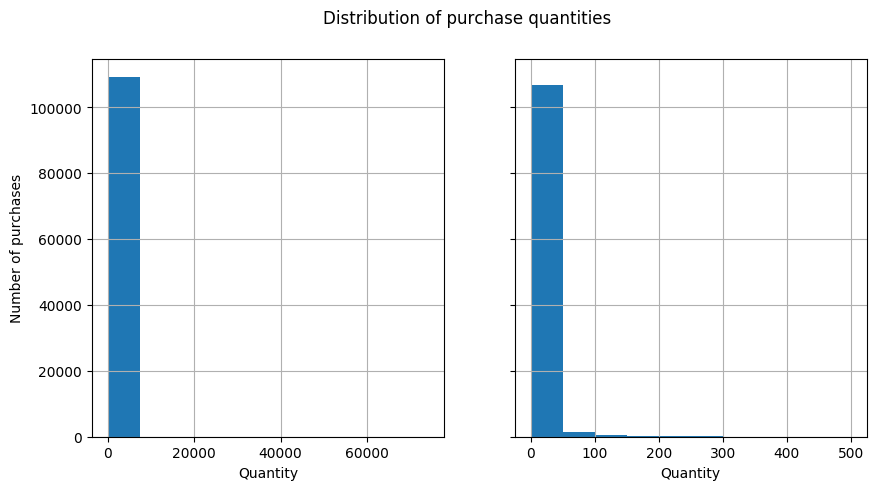

In [40]:
#plot to histograms: one for all quantities, one for those below 500
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
plt.suptitle('Distribution of purchase quantities')
data['quantity'].hist( ax=ax1)
data['quantity'].hist(range = (0,500), ax=ax2)
ax1.set_xlabel('Quantity')
ax2.set_xlabel('Quantity')
ax1.set_ylabel('Number of purchases')
plt.show()

From the above histograms we can see that most of the purchase quantities are under 100. It's rare to see purchases over 300.

In [49]:
np.percentile(data['quantity'], 99.5)

143.0

Only 0.5% of the purchases are higher than 143. Therefore for our analysis, we will consider any purchases over 200 as outliers. We can keep the dataset as it is and just exclude these from the calculations later in the analysis.

# 3.3 Distribution of purchase values

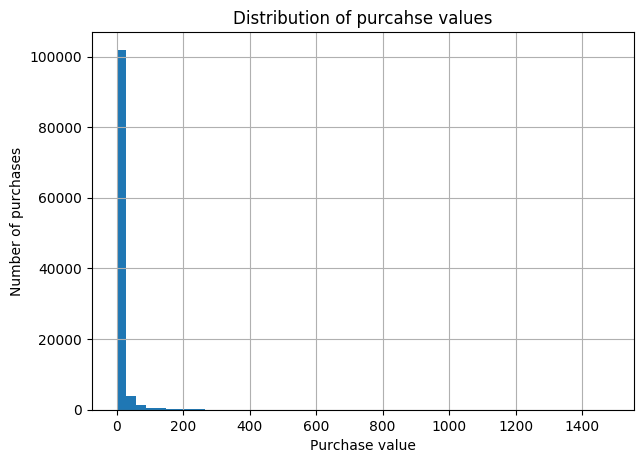

In [50]:
#plot histogram for purchase values after removing quantities higher than 200
data.query('quantity<200')['purchase_value'].hist(bins=50)
plt.title('Distribution of purcahse values')
plt.xlabel('Purchase value')
plt.ylabel('Number of purchases')
plt.show()

We can see from the above that most of purchase valuse are below 400. There are also values as high as over 1000, despite the fact that we excluded the purchase quantities that are higher than 200.

This, on the one hand, is because some items have a much higher unit price; on the other, even if the unit price is 7, having 200 units would make the purchase value approaching 1400. Given we already consider quantity over 200 as outliers, we will keep the purcahse values as they are.

# 3.4 Purchase quantity and value over time

In [51]:
#add a date column to the dataset 
data['purchase_date'] = pd.to_datetime(data['purchase_date'].dt.date)
#group by date and calculate the sum of quantity and values
purchase_by_date = data.groupby('purchase_date').agg({'quantity' : 'sum', 'purchase_value': 'sum'}).reset_index()
purchase_by_date

,purchase_date,quantity,purchase_value
0,2016-12-01,25074,33569.00
1,2016-12-02,40480,33923.93
2,2016-12-03,16553,17824.44
3,2016-12-05,14207,17946.72
4,2016-12-06,19114,25402.23
...,...,...,...
63,2017-02-23,12625,14777.42
64,2017-02-24,11061,14152.52
65,2017-02-25,10629,15859.38
66,2017-02-27,4167,5862.72


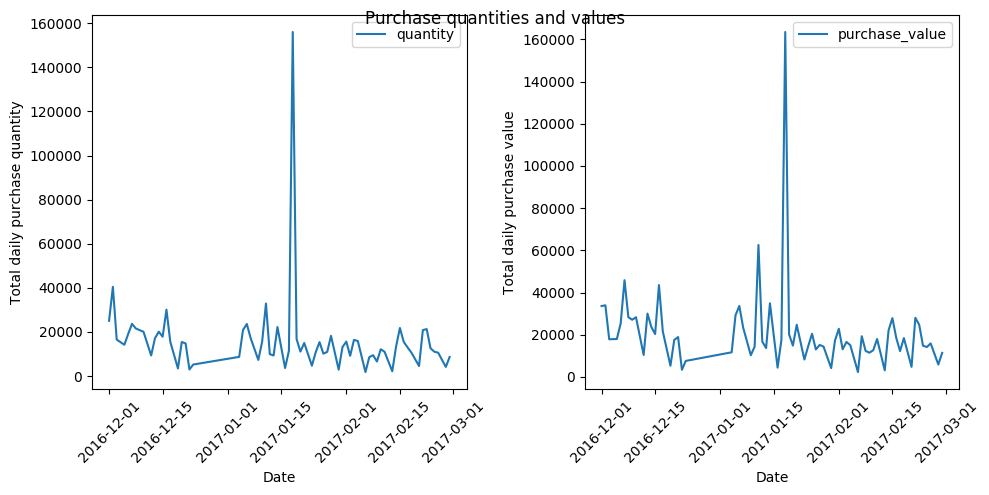

In [52]:
#plot quantity and value by day before removing the quantity outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Purchase quantities and values')
sns.lineplot(data=purchase_by_date, x='purchase_date',
             y='quantity', ax=ax1, label='quantity')
sns.lineplot(data=purchase_by_date,
             x='purchase_date', 
             y='purchase_value', ax=ax2, label='purchase_value')

ax1.set_xlabel('Date')
ax1.set_ylabel('Total daily purchase quantity')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2.set_xlabel('Date')
ax2.set_ylabel('Total daily purchase value')
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()


Before we remove the quantity outliers, we can see that the spike of purchase happened around mid of January. Given what the graphs look like, this seems to be a single purchase of large amount of small value item. Well let's take a look.

In [53]:
data[data['quantity']== data['quantity'].max()]

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,unit_price,purchase_value
51503,c541433,23166,74216,2017-01-18,18025.0,0,shop 21,1.04,77184.64


Yes indeed. This is one of our most extreme outlier purchase, made by a non loyalty program customer.

Next, let's look at the purhcase quantity and value change over tiem after we remove the outliers.

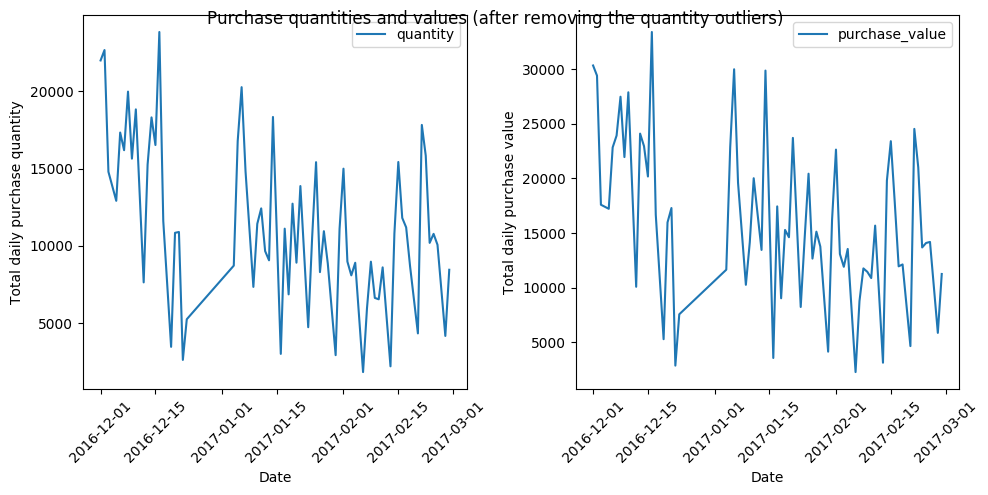

In [54]:
# plot the line graphs after removing the outlier quantities
purchase_by_date_ = data.query('quantity<200').groupby('purchase_date').agg(
    {'quantity': 'sum', 'purchase_value': 'sum'}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Purchase quantities and values (after removing the quantity outliers)')
sns.lineplot(data=purchase_by_date_, x='purchase_date',
             y='quantity', ax=ax1, label='quantity')
sns.lineplot(data=purchase_by_date_,
             x='purchase_date',
             y='purchase_value', ax=ax2, label='purchase_value')

ax1.set_xlabel('Date')
ax1.set_ylabel('Total daily purchase quantity')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

ax2.set_xlabel('Date')
ax2.set_ylabel('Total daily purchase value')
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()

Excluding the outliers, we now see sychronous flutuations in purchase quantities and values. This might reflect weekday and weekend differences in purchases. However, we will not investigate further into this.

# 3.5 Purchase by stores

In [55]:
data['shop_id'].nunique()

31

There are a total of 31 shops. Let's take a look at their overall sales performance before removing the quantity outliers.

In [56]:
purchase_by_store = data.groupby('shop_id').agg(
    {'quantity': 'sum', 'purchase_value': 'sum'}).reset_index()
purchase_by_store.sort_values(by='quantity', ascending=False)

,shop_id,quantity,purchase_value
0,shop 0,129212,137229.92
7,shop 15,111258,130907.16
14,shop 21,89969,99772.88
26,shop 5,42538,70588.60
25,shop 4,36761,48919.25
24,shop 30,34897,40804.53
13,shop 20,34700,61544.35
17,shop 24,31780,42378.34
5,shop 13,31415,48603.76
9,shop 17,31182,29020.97


High quantity in general also leads to high purchase values, but not always so. Next, let's make a scatterplot for store total quantity and values.

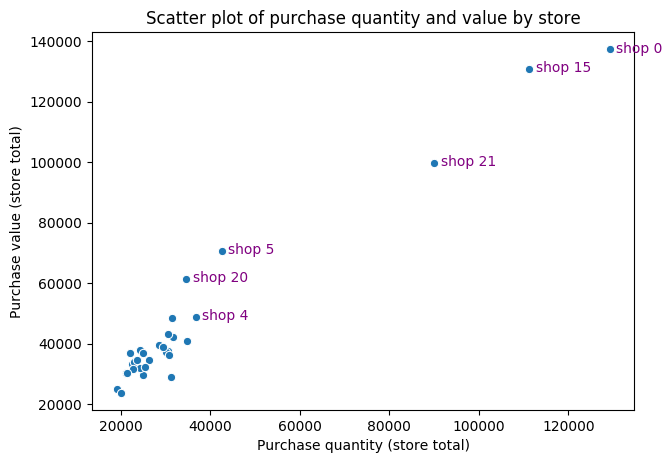

In [57]:
# plot the scatter plot before removing the outlier quantities
sns.scatterplot(data=purchase_by_store,
                x='quantity',
                y='purchase_value')
plt.title('Scatter plot of purchase quantity and value by store')
plt.xlabel('Purchase quantity (store total)')
plt.ylabel('Purchase value (store total)')

for x, y, z in zip(purchase_by_store['shop_id'], 
                   purchase_by_store['purchase_value'], 
                   purchase_by_store['quantity']):
    if y > np.percentile(purchase_by_store['purchase_value'], 80):
        plt.text(x=z+1500,
                 y=y-1000,
                 s=x,
                 color='purple')
plt.show()

Before we remove the quantity outliers, we can see that shop 0, shop 15, shop 21, shop 5, shop 20, and shop 4 are the top 5 performance stores, with the highest purchase quantity, as well as purchase values.

Next, let's take a look at how they performed after we remove the outliers.

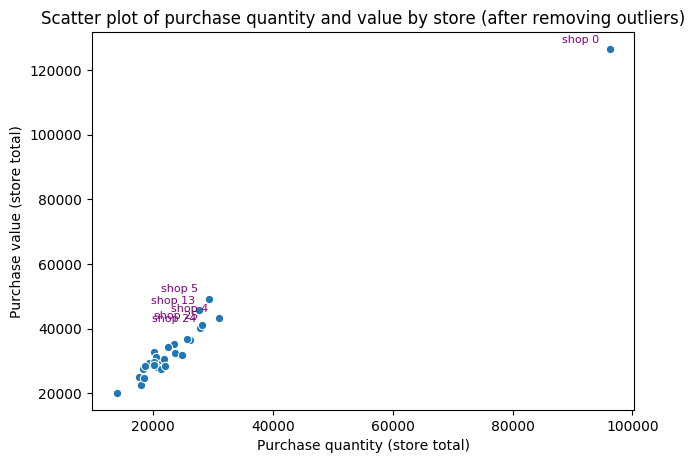

In [58]:
# plot the scatter plot after removing the outlier quantities
purchase_by_store_ = data.query('quantity < 200').groupby('shop_id').agg(
    {'quantity': 'sum', 'purchase_value': 'sum'}).reset_index()

sns.scatterplot(data=purchase_by_store_,
                x='quantity',
                y='purchase_value')
plt.title(
    'Scatter plot of purchase quantity and value by store (after removing outliers)')
plt.xlabel('Purchase quantity (store total)')
plt.ylabel('Purchase value (store total)')

for x, y, z in zip(purchase_by_store_['shop_id'],
                   purchase_by_store_['purchase_value'],
                   purchase_by_store_['quantity']):
    if y > np.percentile(purchase_by_store_['purchase_value'], 80):
        plt.text(x=z-8000,
                 y=y+2000,
                 s=x,
                 color='purple',
                 size=8)
plt.show()

In [59]:
purchase_by_store_.sort_values(by='purchase_value', ascending=False).head()

,shop_id,quantity,purchase_value
0,shop 0,96217,126369.47
26,shop 5,29441,49346.18
5,shop 13,27707,45691.07
25,shop 4,31033,43319.61
18,shop 25,28224,41158.71


It's a little crowded above to see but we can still tell that shop 0 still appears to be the top performing store after removing the outliers. Following shop 0, the next 4 high performance shops are shop 5, shop 13, shop 4, and shop 25.

Ideally, we can also take a look at purchase per customer by store. However, we have a large number of missing values in customer_id's and therefore we won't be able to perform this analysis here.

With or without the outliers, shop 0 seems to be the star store among all.

# 3.6 Popular items

Let's take a look at what items are sold the most across all stores.

In [60]:
data.groupby('item_id').agg({'quantity': 'sum'}).reset_index(
).sort_values(by='quantity', ascending=False).head(10)

,item_id,quantity
1837,23166,148430
2627,85123a,22566
2243,84347,11678
2215,84077,10126
413,21212,9359
2611,85099b,7761
1082,22197,6988
1538,22693,6830
1465,22616,5764
1930,37413,5672


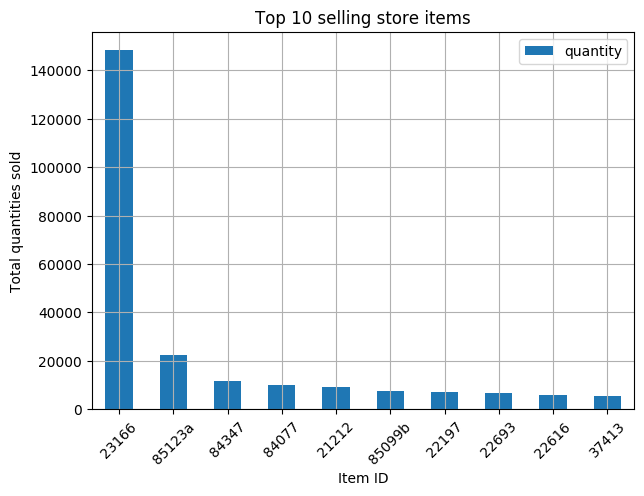

In [61]:
data.groupby('item_id').agg({'quantity': 'sum'}).reset_index(
).sort_values(by='quantity', ascending=False).head(10).plot(x='item_id', kind='bar')
plt.title('Top 10 selling store items')
plt.xlabel('Item ID')
plt.ylabel('Total quantities sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Outliers included, we can see that the top selling item in the stores is item 23166, which has sales quantities 7 times higher than the next item, 85123a.

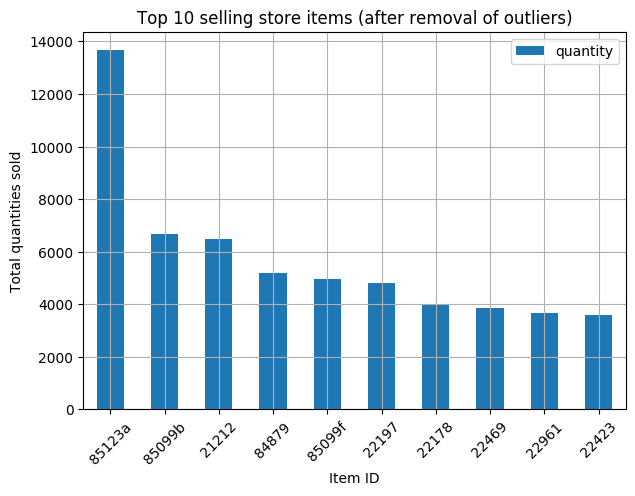

In [62]:
#plot top selling items after removing the outliers
data.query('quantity <200').groupby('item_id').agg({'quantity': 'sum'}).reset_index(
).sort_values(by='quantity', ascending=False).head(10).plot(x='item_id', kind='bar')
plt.title('Top 10 selling store items (after removal of outliers)')
plt.xlabel('Item ID')
plt.ylabel('Total quantities sold')
plt.xticks(rotation=45)
plt.grid()
plt.show()

After we remove the outliers, 85123a become the top selling item. However, unless it's an entry error, we probably don't need to exclude the outliers for the purpose of this analysis.

# 4.6 Proportion of loyalty customers

In [63]:
data['loyalty_program'].value_counts()/data.shape[0]

0    0.77574
1    0.22426
Name: loyalty_program, dtype: float64

Overall, less than 25% of the purchases are made by customers who are not in the loyalty program. Let's see how that differs among stores.

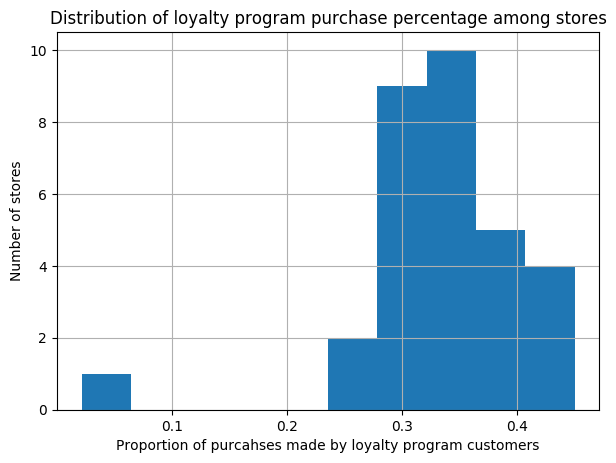

In [64]:
data.groupby('shop_id').agg({'loyalty_program' :'mean'}).reset_index().hist()
plt.title('Distribution of loyalty program purchase percentage among stores')
plt.xlabel('Proportion of purcahses made by loyalty program customers')
plt.ylabel('Number of stores')
plt.show()

We can see that for most of the store, loyalty program customer contribute to around 30-40% of the purchases.

# 4.7 Correlation between loyalty membership and purchases

In [65]:
data.groupby('loyalty_program')['quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
loyalty_program,,,,,,,,
0,84665.0,10.081450,364.668401,0.0,0.0,2.0,7.0,74216.0
1,24476.0,10.055115,54.593324,0.0,1.0,3.0,9.0,3905.0


In [66]:
data.query('quantity<200').groupby('loyalty_program')['quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
loyalty_program,,,,,,,,
0,84440.0,6.874562,16.079821,0.0,0.0,2.0,7.0,199.0
1,24372.0,7.608280,16.224409,0.0,1.0,3.0,9.0,199.0


In [67]:
data.groupby('loyalty_program')['purchase_value'].describe()

,count,mean,std,min,25%,50%,75%,max
loyalty_program,,,,,,,,
0,84665.0,13.061982,382.552732,0.0,0.0,1.45,9.66,77184.64
1,24476.0,13.152024,83.884436,0.0,0.0,3.32,11.05,6689.67


In [68]:
data.query('quantity<200').groupby('loyalty_program')['purchase_value'].describe()

,count,mean,std,min,25%,50%,75%,max
loyalty_program,,,,,,,,
0,84440.0,9.888135,34.373919,0.0,0.0,1.45,9.615,1482.74
1,24372.0,10.546041,29.687659,0.0,0.0,3.30,10.900,1317.50


Next, let's also plot the daily changes to average purchase quantity for both customer groups.

In [69]:
purchase_loyalty_date = data.query('quantity<200').groupby(['loyalty_program', 'purchase_date']).agg(
    {'quantity': 'sum', 'purchase_value': 'sum', 'purchase_id':'count'}).reset_index()

In [70]:
purchase_loyalty_date['average_quantity'] = purchase_loyalty_date['quantity'] / \
    purchase_loyalty_date['purchase_id']

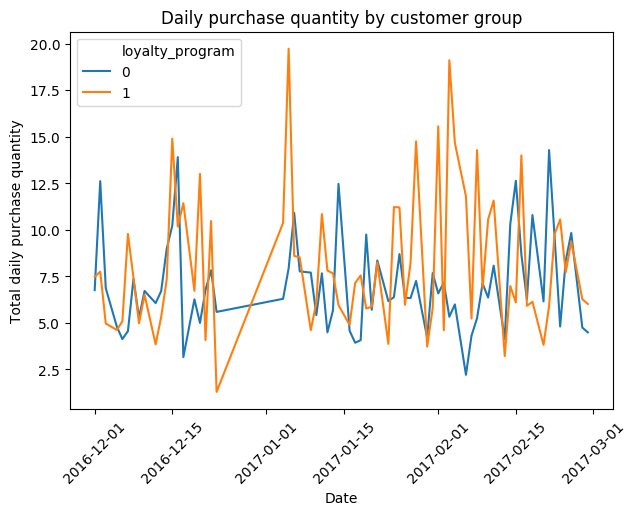

In [71]:
sns.lineplot(data=purchase_loyalty_date, x='purchase_date',
             y='average_quantity', hue = 'loyalty_program')
plt.title('Daily purchase quantity by customer group')
plt.xlabel('Date')
plt.ylabel('Total daily purchase quantity')
plt.xticks(rotation=45)
plt.legend()
plt.show()

From the above we can see that for both customer groups there are some outliers in purchase quantities towards the higher end.

Excluding the outliers, purchases by customers from loyalty program have a slightly higer mean and median purchase quantity. The mean and median purchase value for loyalty program customers are also higher than those who are not in the loyalty program.

A plot of the daily average purchase quantity also shows loyalty program customers performed slightly better than thsoe who are not in the program.

In the next section, we will carry out a statistical testing to see if the difference is significant.

# 4.8 Correlation between proportion of loyalty program cutomers purchases and store performance

In [72]:
#calculate percentage of loyalty customer purcahses and sum of purchase
loyalty_purchase = data.query('quantity<200').groupby('shop_id').agg(
    {'loyalty_program': 'mean', 'quantity': 'sum', 'purchase_value': 'sum'}).reset_index()
loyalty_purchase.head()

,shop_id,loyalty_program,quantity,purchase_value
0,shop 0,0.021635,96217,126369.47
1,shop 1,0.354480,21497,30268.60
2,shop 10,0.301987,23576,35241.06
3,shop 11,0.410072,20409,29467.83
4,shop 12,0.333333,17751,24959.99


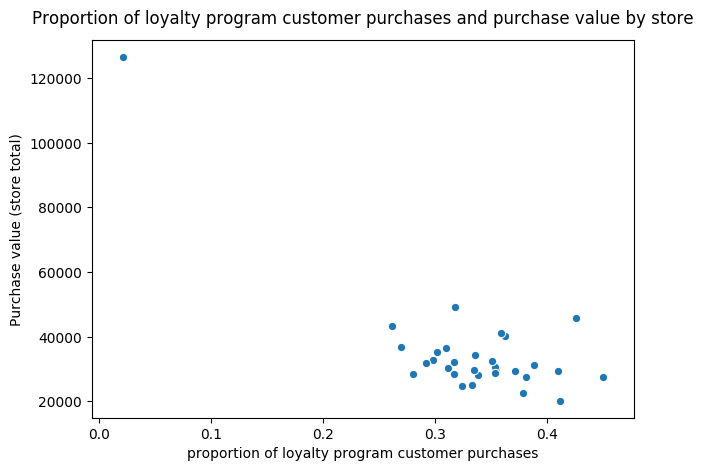

In [73]:
#scatterplot proportion of loyalty program purchaess and total purchase value by store
sns.scatterplot(data=loyalty_purchase,
                x='loyalty_program',
                y='purchase_value')
plt.title(
    'Proportion of loyalty program customer purchases and purchase value by store',
    pad=12)
plt.xlabel('proportion of loyalty program customer purchases')
plt.ylabel('Purchase value (store total)')
plt.show()

Here we don't really see any clear correlation patterns. Most of the stores are scattered in the right bottom corner whereas one shop (shop 0) has the lowest proportion of loyalty program customer purchases but the highest total purchase value.

# Part 3 summary

In this section, results of the exploratory data analysis reveals that there are indeed outliers in purchase quantities. Excluding these outliers, shop 0, shop 5, shop 13, shop 4, and shop 25 are the top performing stores in terms of both quantity and values. Shop 0, in particular, stands out as the sales star with or without the quantity outliers.

Comparing the average quantity and values, we can see purchases made by loyalty program customers are higher than those made by others in both asepcts. However, we do need to keep in mind that the two groups vary significantly in size: none loyalty program customer purchases also triple the loyalty program customer purchases.

In the next section, we will carry out two statistical tests to compare the two groups' average purchase quantity and value.

# Part 4: Hypothesis testing

In this section, we will perform two statistical significance testing.

The first will test the mean purchase quantities between loyalty program and non loyalty program customers. Our null hypothesis is that customers from loyalty programs have the same average purchase quantities as those who are not from loyalty programs. The alternative hypothesis is that they are different.

The second will test the mean purchase values between loyalty program and non loyalty program customers. Our null hypothesis is that customers from loyalty programs have the same average purchase values as those who are not from loyalty programs. The alternative hypothesis is that they are different.

We will use the data removed of the outliers in purchase quantity. The purchase values are related to purchase quantities with an additional factor of unit price. It is considered important to carry out both testings because we want to see if customers in the loyalty program are more likely to purchase expensive products and generate higher average purchase values.

A T test will be performed for both. Assumptions to carry out T test are considered to have been met because the purcahses in the data are independant of one another. From previous visualization we already clearly see that neither the purchase quantity or values are normally distributed. However, the sample size for both loyalty program and non loyalty program customer purchases are large in this project. Therefore, the two-sample t-test is robust to non-normality due to the central limit theorem.

For both statistical testing, as well as the Shapiro normality test and the levene equal variance testing, we will set alpha as 0.05.

For the statistical testing, quantity is being used twice, once in testing if the mean quantity is the same, second time in testing if the mean purchase value is the same (purchaes value is the result of quantity * unit_price). Therefore we will adjust the alpha value using Bonferoni method and divide it by 2, which would be 0.025.

# Tesing 1: purchase quantities

In [74]:
#slice two subsets for testing 
loyalty_quantity = data.query('(quantity<200) & (loyalty_program == 1)')['quantity']
non_loyalty_quantity = data.query('(quantity<200) & (loyalty_program == 0)')['quantity']

In [75]:
print('Mean of loyalty program customer purchase quantity: ',
      loyalty_quantity.mean())
print('\nMean of non loyalty program customer purchase quantity: ',
      non_loyalty_quantity.mean())

Mean of loyalty program customer purchase quantity:  7.608279993435089

Mean of non loyalty program customer purchase quantity:  6.874561819043108


First, we need to do a shapiro test to see if the two sets of scores are from a normal distribution. We perhaps don't really need to do this as we can already tell from previous visualization. But let's go ahead anyway.

In [76]:
st.shapiro(loyalty_quantity)

(0.44701772928237915, 0.0)

In [77]:
st.shapiro(non_loyalty_quantity)

(0.42407339811325073, 0.0)

As expected, neither is from a normal distribution. So we will use levene test again to check on variance.

In [78]:
st.levene(loyalty_quantity, non_loyalty_quantity, center = 'mean')

LeveneResult(statistic=5.283793780036412, pvalue=0.02152668372780346)

The test above results in a pvalue smaller than 0.05, therefore we will set equal_var as False.

In [79]:
st.ttest_ind(loyalty_quantity, non_loyalty_quantity, equal_var=False).pvalue

4.660841530510829e-10

Pvalue from the above is very small and smaller than 0.025. Therefore we can reject the null hypothesis, average purchase quantity from loyalty program customers are not the same as none loyalty program customers.

If we are to perform a one sided test and set the alternative hypothesis as loyalty program customers have a higher average purchase quantities than non loyalty program customers, we will divided the pvalue by 2.

In [80]:
st.ttest_ind(loyalty_quantity, non_loyalty_quantity, equal_var=False).pvalue/2

2.3304207652554143e-10

The result, as we would expect, is much smaller than alpha level 0.025. Therefore we can again reject the null hypothesis and conclude that loyalty program customers make a higher average purchase quantity than non loyalty program customers.

# Testing 2

In [81]:
#slice two subsets for testing 
loyalty_value = data.query('(quantity<200) & (loyalty_program == 1)')['purchase_value']
non_loyalty_value = data.query('(quantity<200) & (loyalty_program == 0)')['purchase_value']



In [82]:
print('Mean of loyalty program customer purchase value: ',
      loyalty_value.mean())
print('\nMean of non loyalty program customer purchase value: ',
      non_loyalty_value.mean())

Mean of loyalty program customer purchase value:  10.546040948629575

Mean of non loyalty program customer purchase value:  9.888134770251066


In [83]:
st.shapiro(loyalty_value)

(0.3100327253341675, 0.0)

In [84]:
st.shapiro(non_loyalty_value)

(0.24890673160552979, 0.0)

Neither is from a normal distribution. So we will use levene test again to check on variance.

In [85]:
st.levene(loyalty_value, non_loyalty_value, center = 'mean')

LeveneResult(statistic=2.6261026313718805, pvalue=0.10512235642678254)

The test above results in a pvalue higher than 0.05, therefore we will set equal_var as True.

In [86]:
st.ttest_ind(loyalty_value, non_loyalty_value, equal_var=True).pvalue

0.006720541665389104

Pvalue from the above is very small and smaller than 0.025. Therefore we can reject the null hypothesis, average purchase value from loyalty program customers are not the same as none loyalty program customers.

Similarly, the alternative hypothesis if we are to perform a one sided test is loyalty program customers make higher average purchases than none loyalty program customers. Dividing the pvalue by 2 make it even smaller and therefore still smaller than pvalue 0.025.

Therefore we can reject the null hypothesis and conclude that loyalty program customers have higher average purchase values than none loyalty program customers.

# Part 4 summary

In this section, the results of our statistical testing show that loyalty program customers on average make higher quantity purchases and generate higher purchase values. This is useful insights for the company when it needs to justify the promotion of loyalty programs.

# Part 5: Findings and conclusions 

In conclusion, examination of the purchase data from 2016-12-01 to 2017-02-28 from a total of 31 Home World retail stores reveal that the top 5 performing stores are shop 0, shop 5, shop 13, shop 4, and shop 25. Shop 0 in particular stands out to have performed the best even taking into account of the outliers in the data.

Overall the purchase quantity and values fluctuate throughout the weeks, except when an extremely large amount of a particular item was purchased on 2017-01-18.

Analysis of the data shows that loyalty program customers contribute to close to 25% of the toal purchases. On average, loyalty program customers make larger quantity purchase and generate higher values than the customers not in the program.

As a next step, the company could further investigate the top performing stores if it's interested in finding out why they outperformed the others, especially shop 0.

It also makes sense to promote loyalty programs among the customers given it seems to boost customer purchases. $20 a month seems a little expensive as membership fees, especially considering most companies nowadays offer free loyalty membership. Perhaps the company could try promote free loyalty program membership if monthly spend exceeds certain amount, or free membership for the first 3 months or so.

# Part 6: Resources

How to label data in seaborn plots : This article helps with highlighting particular values on seaborn graphs.
https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9

How to rotate xtick labels: I struggled with rotating the dates as xticklabels and this thread really helped.
https://stackoverflow.com/questions/43152502/how-can-i-rotate-xticklabels-in-matplotlib-so-that-the-spacing-between-each-xtic

50 stats about good loyalty programs: This article gives some insights into what loyalty programs work and why, which I found helpful in writing up the conclusions.
https://www.forbes.com/sites/blakemorgan/2020/05/07/50-stats-that-show-the-importance-of-good-loyalty-programs-even-during-a-crisis/?sh=300130772410

Choosing Mann whitney u test: this article and the two below help with the decision on which statistical test to use.
https://thestatsgeek.com/2014/04/12/is-the-wilcoxon-mann-whitney-test-a-good-non-parametric-alternative-to-the-t-test/

Further read on Mann Whitney U test: http://thestatsgeek.com/2014/04/12/is-the-wilcoxon-mann-whitney-test-a-good-non-parametric-alternative-to-the-t-test/

Further read T test: https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50